In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

import numpy as np
from scipy import ndimage
from scipy import misc
import math
import cv2
from coin.segmenter import create_better_mask

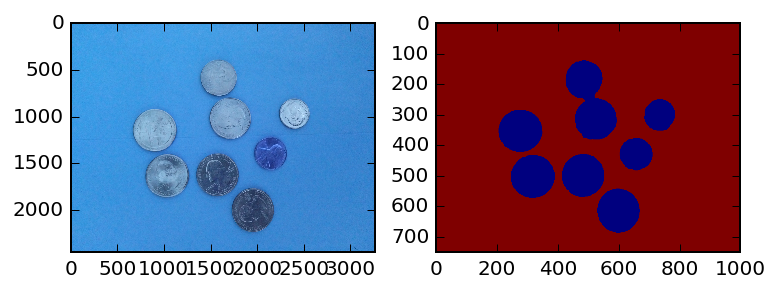

In [2]:
imgPath = 'raw/IMG_8189.jpg'

img = cv2.imread(imgPath)
mask = create_better_mask(imgPath)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)

In [47]:
rect = (50,50,np.shape(img)[1]-100,np.shape(img)[0]-100)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
imgr = img*mask2[:,:,np.newaxis]

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 'gray')
plt.subplot(122)
plt.imshow(imgr)

plt.show()

error: /tmp/opencv-pcqRHK/opencv-2.4.10.1/modules/imgproc/src/grabcut.cpp:329: error: (-5) mask must have as many rows and cols as img in function checkMask


In [46]:
import coin.utils
print resize_image

<function resize_image at 0x11557cc80>


In [19]:
best_total = 0;
total = 0;
for i in xrange(refined_mm.shape[0]):
    for j in xrange(refined_mm.shape[1]):
        if refined_mm[i][j] == 0:
            total += 1
            if (total > best_total):
                best_total = total
        else:
            total = 0
            
print best_total

149


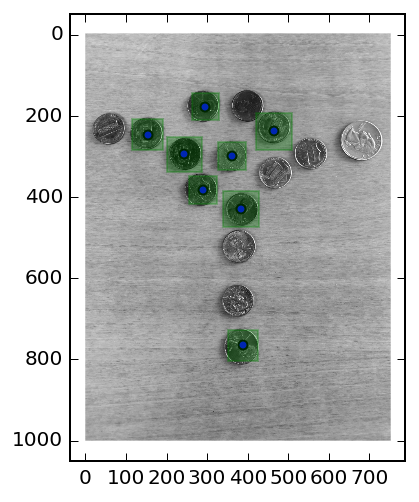

In [20]:
from matplotlib.patches import Rectangle
def draw_circles(plt, circles):
    plt.scatter(circles[0,:,0], circles[0,:,1])
    for i in range(circles.shape[1]):
        x = circles[0,i,0]
        y = circles[0,i,1]
        r = circles[0,i,2]
        plt.add_patch(Rectangle((x - r, y - r), r * 2, r * 2, facecolor='green', edgecolor='green', alpha=0.3))

grayIm = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
f, axarr = plt.subplots(1,1)
circles = cv2.HoughCircles(255 * refined_mm, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1=70, param2=18, minRadius=10, maxRadius=best_total +1)
# circles = cv2.HoughCircles(grayIm, cv2.cv.CV_HOUGH_GRADIENT, 1, grayIm.shape[0]/7, param1=200, param2=100, minRadius=0, maxRadius=0)
axarr.imshow(grayIm, 'gray')
draw_circles(axarr, circles)

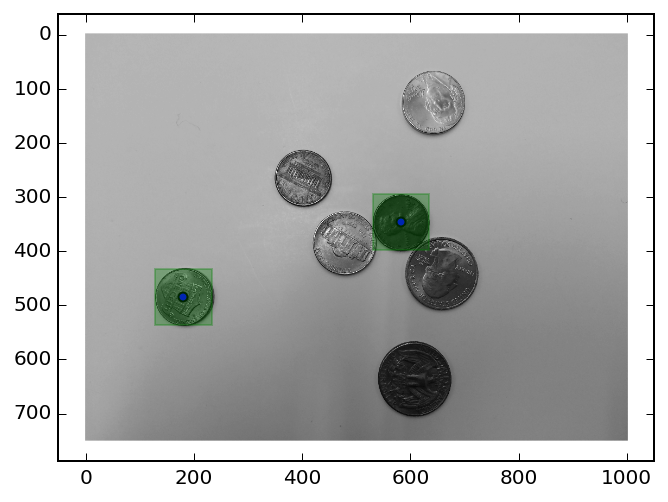

In [188]:
from matplotlib.patches import Rectangle
def draw_circles(plt, circles):
    plt.scatter(circles[0,:,0], circles[0,:,1])
    for i in range(circles.shape[1]):
        x = circles[0,i,0]
        y = circles[0,i,1]
        r = circles[0,i,2]
        plt.add_patch(Rectangle((x - r, y - r), r * 2, r * 2, facecolor='green', edgecolor='green', alpha=0.3))

grayIm = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
f, axarr = plt.subplots(1,1)
# circles = cv2.HoughCircles(255 * refined_mm, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1=70, param2=18, minRadius=10, maxRadius=best_total +1)
circles = cv2.HoughCircles(grayIm, cv2.cv.CV_HOUGH_GRADIENT, 1, grayIm.shape[0]/7, param1=200, param2=100, minRadius=0, maxRadius=0)
axarr.imshow(grayIm, 'gray')
draw_circles(axarr, circles)

In [50]:
#watershed 
# plt.imshow(np.where((mask==3),0,1).astype('uint8'))
ret, markers = cv2.connectedComponents(mask) 
plt.imshow(markers)

AttributeError: 'module' object has no attribute 'connectedComponents'

<matplotlib.colorbar.Colorbar instance at 0x1281e8320>

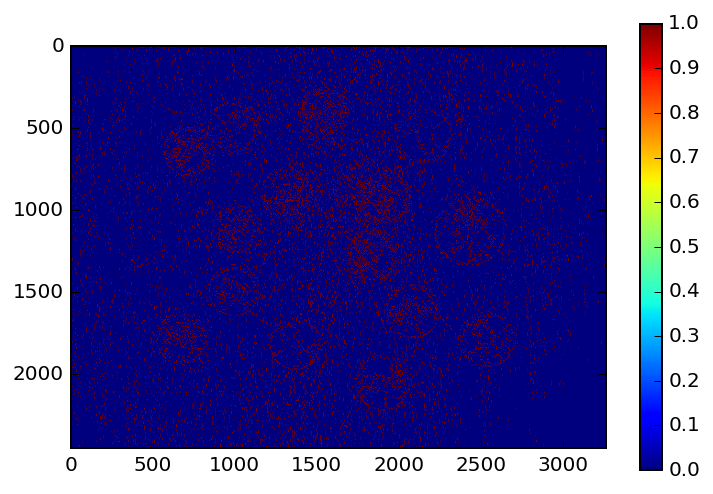

In [38]:
hsvIm = matplotlib.colors.rgb_to_hsv(im)
#edges = corner_harris(hsvIm[:,:,0])
plt.imshow(canny(im[:,:,1]))
plt.colorbar()

In [2]:
import cv2
def convert_cv_im_to_scipy_im(im):
    return np.dstack((im[:,:,2], im[:,:,1], im[:,:,0]))

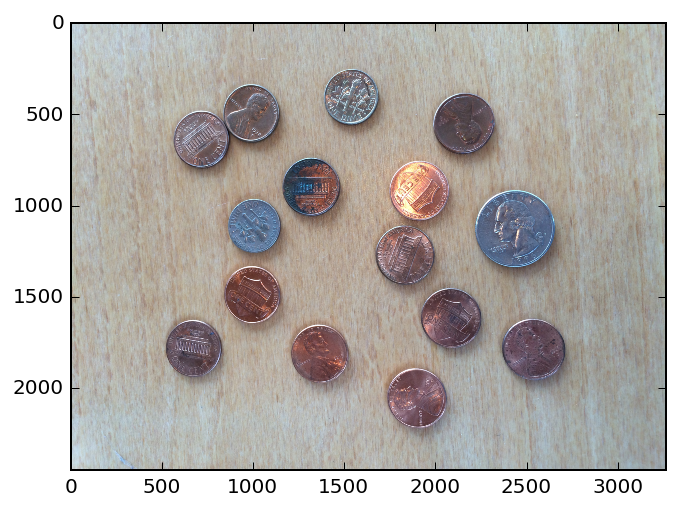

In [13]:
color_im = cv2.imread('/Users/anthonys/Dropbox/College/classes/computer vision/280_final_project/raw_data/Photo Apr 24, 3 04 15 PM.jpg')
gim2 = cv2.GaussianBlur(color_im, (5, 5), 0.0)
plt.imshow(convert_cv_im_to_scipy_im(gim2))

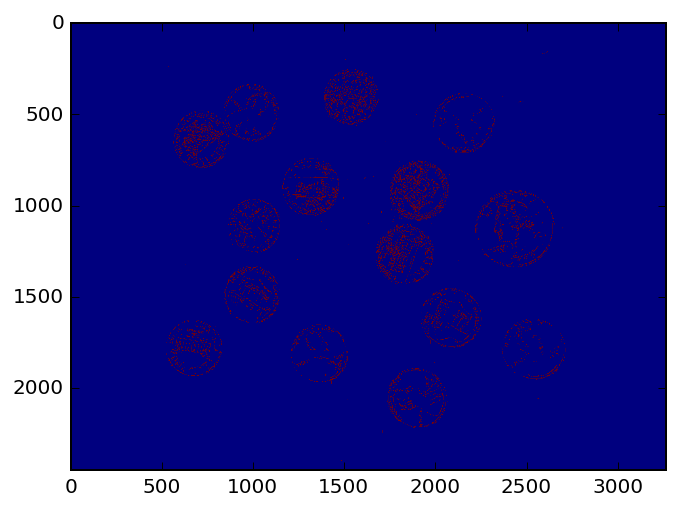

In [12]:
gray_im = cv2.imread('/Users/anthonys/Dropbox/College/classes/computer vision/280_final_project/raw_data/Photo Apr 24, 3 04 15 PM.jpg', 0)

edges = cv2.Canny(gray_im,100,300)
plt.imshow(edges)

<matplotlib.colorbar.Colorbar instance at 0x1073c2a70>

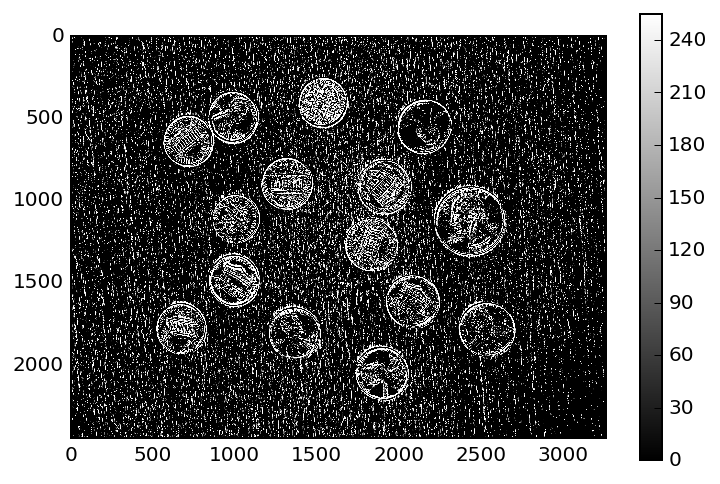

In [14]:
th3 = cv2.adaptiveThreshold(gray_im ,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,51,10)

plt.imshow(th3, 'gray')
plt.colorbar()

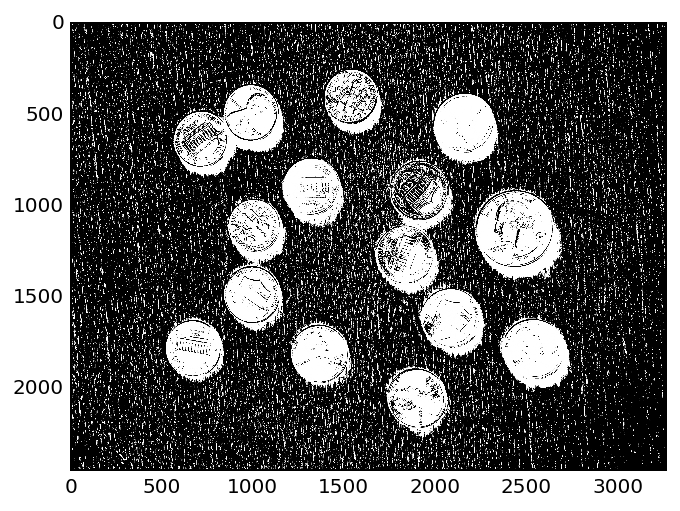

In [15]:
ret, thresh = cv2.threshold(gray_im,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh + th3, 'gray')


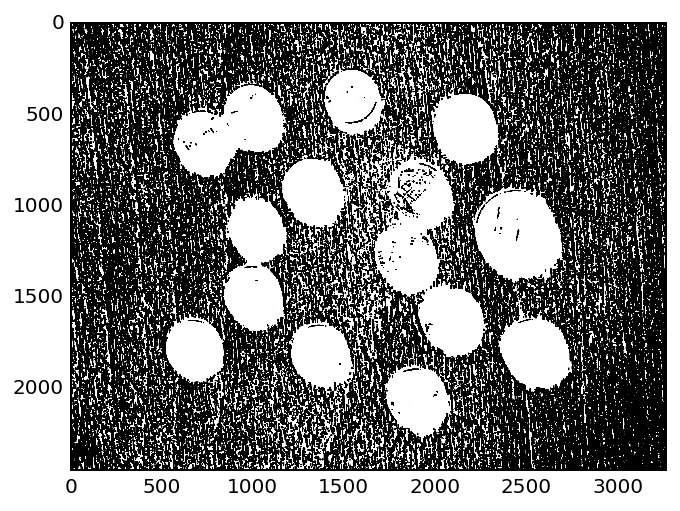

In [16]:
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh + th3,cv2.MORPH_CLOSE,kernel, iterations = 3)
plt.imshow(closing, 'gray')

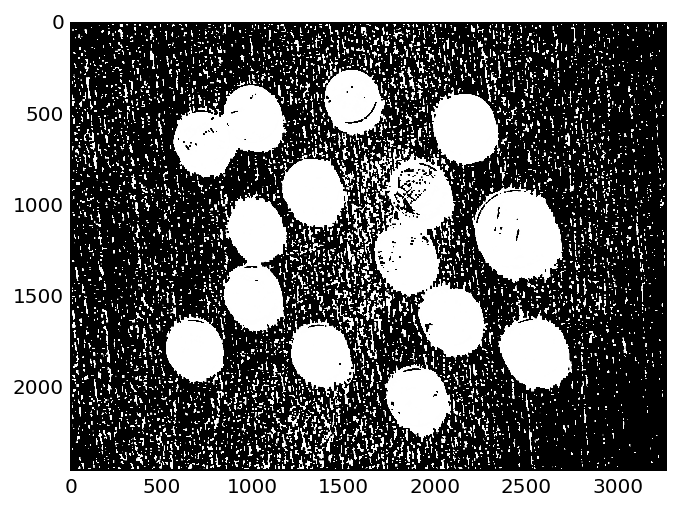

In [17]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel, iterations=2)
plt.imshow(opening, 'gray')

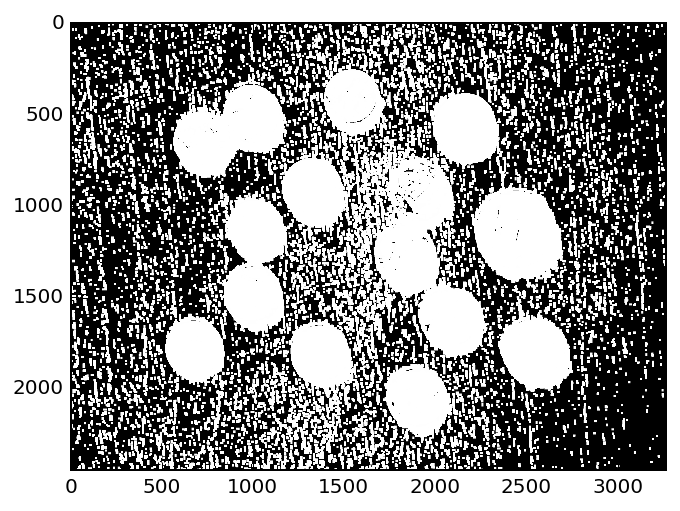

In [18]:
kernel2 = np.ones((3,3),np.uint8)

sure_bg = cv2.dilate(opening,kernel2,iterations=3)
plt.imshow(sure_bg, 'gray')

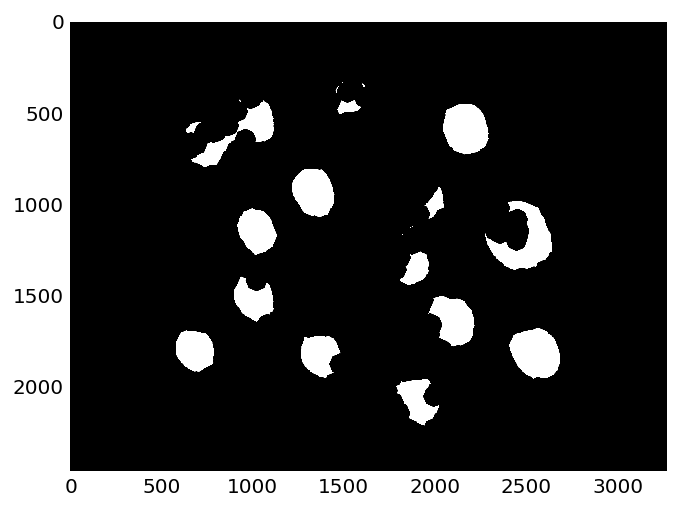

In [19]:
dist_transform = cv2.distanceTransform(opening,cv2.cv.CV_DIST_L2, 3)
ret, sure_fg = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(sure_fg, 'gray')

In [ ]:
mask = np.zeros(gray_im.shape[:2],np.uint8)
mask[sure_fg == 0] = cv2.GC_PR_BGD
mask[sure_fg == 255] = cv2.GC_FGD

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (0,0,gray_im.shape[1],gray_im.shape[0])
cut = cv2.grabCut(color_im, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

In [ ]:
plt.imshow(mask)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x1d03c4248>

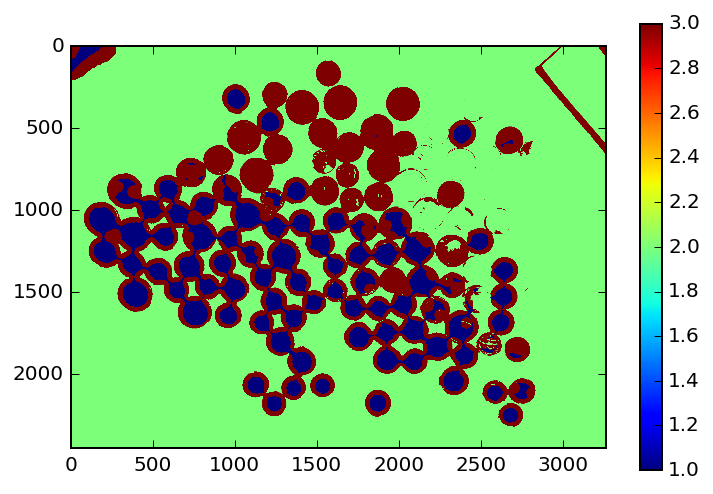

In [53]:
plt.imshow(mask)
plt.colorbar()

In [54]:
overlay_mask = np.where((mask == cv2.GC_FGD)|(mask == cv2.GC_PR_FGD),1,0).astype('uint8')

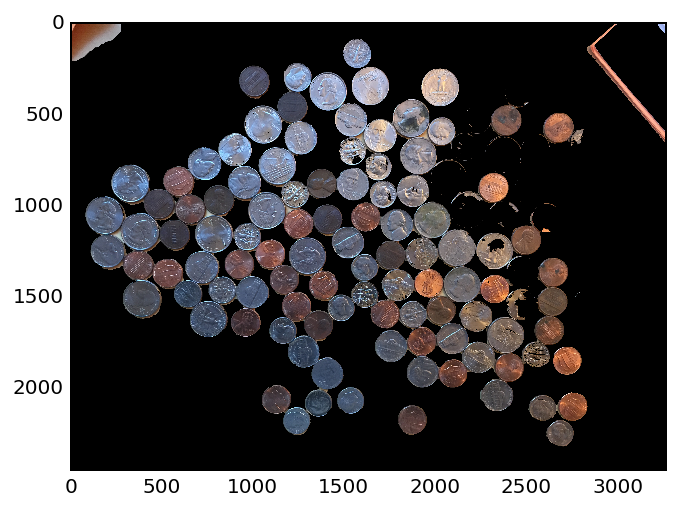

In [55]:
masked_im = color_im * overlay_mask[:,:,np.newaxis]
plt.imshow(convert_cv_im_to_scipy_im(masked_im))

In [58]:
contours = cv2.findContours(overlay_mask, cv2.cv.CV_RETR_EXTERNAL, cv2.cv.CV_CHAIN_APPROX_SIMPLE )

In [8]:
plt.imshow(overlay_mask, 'gray')

NameError: name 'overlay_mask' is not defined

In [3]:
from coin.segmenter import create_coin_mask

In [9]:
mm = create_coin_mask(color_im)

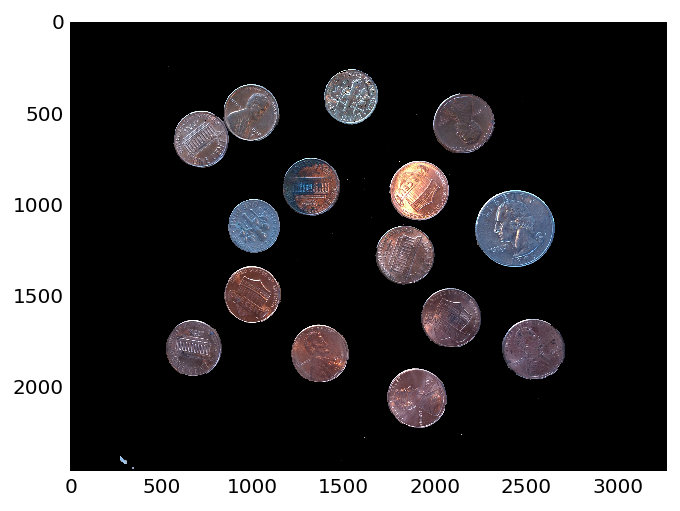

In [10]:
masked_im = color_im * mm[:,:,np.newaxis]
plt.imshow(convert_cv_im_to_scipy_im(masked_im))

In [14]:
kernel = np.ones((4,4),np.uint8)
refined_mm = cv2.morphologyEx(mm,cv2.MORPH_CLOSE,kernel, iterations = 2)

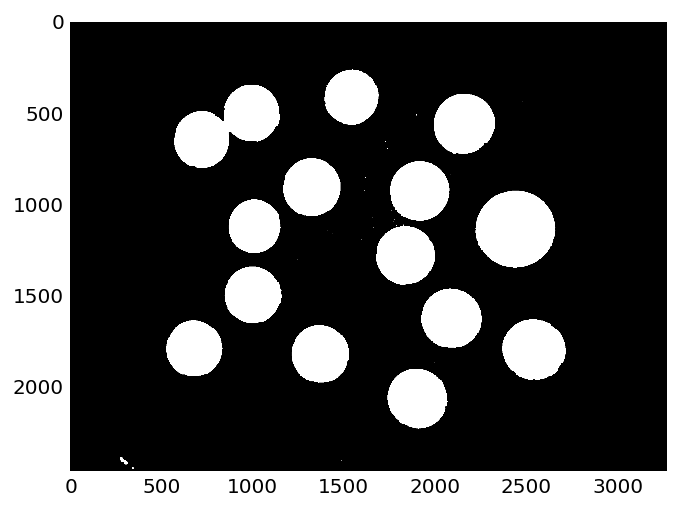

In [16]:
plt.imshow(refined_mm, 'gray')

In [145]:
circles = cv2.HoughCircles(255 * refined_mm, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1=70, param2=18, minRadius=10, maxRadius=500)

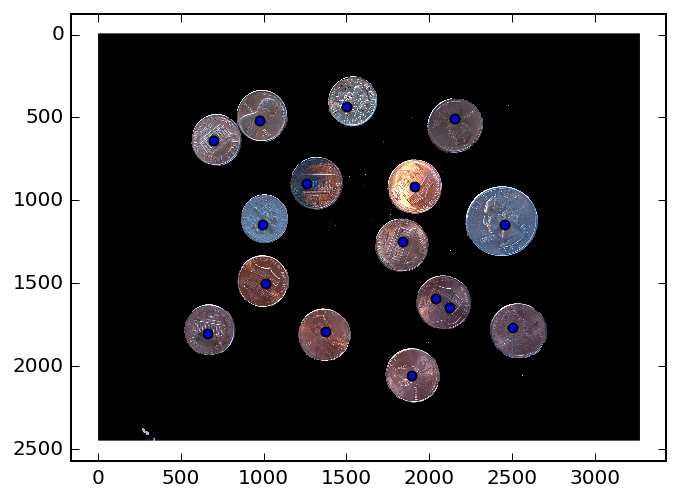

In [164]:
circles = cv2.HoughCircles(255 * refined_mm, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1=100, param2=18, minRadius=10, maxRadius=500)
output_im = color.gray2rgb(color_im)
# plt.imshow(convert_cv_im_to_scipy_im(output_im))
plt.imshow(convert_cv_im_to_scipy_im(masked_im))
plt.scatter(circles[0,:,0], circles[0,:,1])

In [8]:
im3 = cv2.imread('/Users/anthonys/Dropbox/College/classes/computer vision/280_final_project/raw_data/Photo Apr 24, 3 05 16 PM.jpg')

In [9]:
mm3 = create_coin_mask(im3)

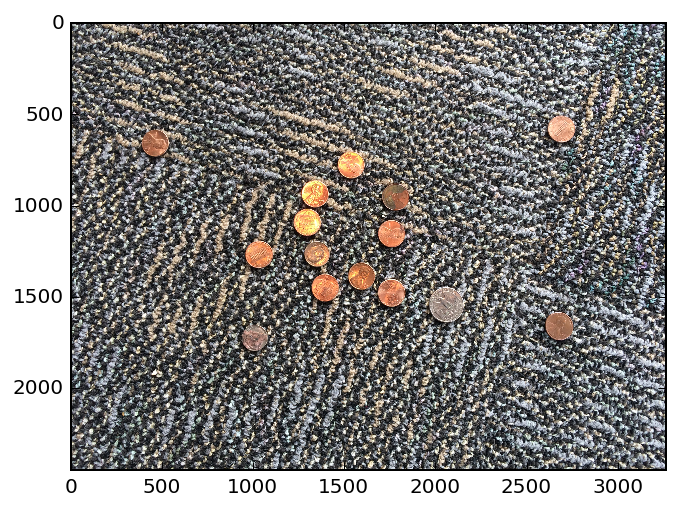

In [10]:
plt.imshow(convert_cv_im_to_scipy_im(im3))

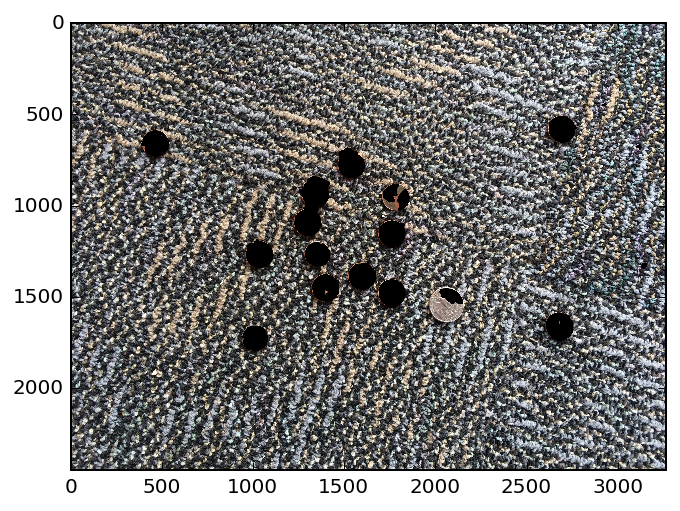

In [11]:
maskedim3 = im3 * mm3[:,:,np.newaxis]
plt.imshow(convert_cv_im_to_scipy_im(maskedim3))